Churn Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [6]:
#importing Dataset

df = pd.read_csv(r'E:\Coding\CodeClause Intern\Customer Churn rate analysis\bigml_59c28831336c6604c800002a.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.shape

(3333, 21)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

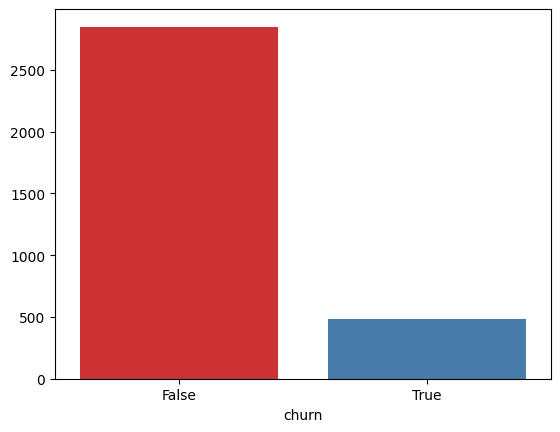

In [8]:
val=df['churn'].value_counts()
sns.barplot(x=val.index, y=val.values, palette='Set1')
plt.tight_layout

In [9]:
#Finding Churn Percentage

val_True = df['churn'][df['churn']==True]

val_TrueNo = val_True.count()
val_TotalNo= df['churn'].count()

print ("Churn Percentage = "+str( val_TrueNo/val_TotalNo * 100 ))

Churn Percentage = 14.491449144914492


Churn Percentage = 14.49

Imbalanced Data : Lesser datapoints in True Churn

Descriptive Analysis :

In [10]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.isnull().value_counts()

state  account length  area code  phone number  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
False  False           False      False         False               False            False                  False              False            False             False              False            False             False                False              False               False               False             False              False                   False    3333
Name: count, dtype: int64

Null Values not present in the data

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

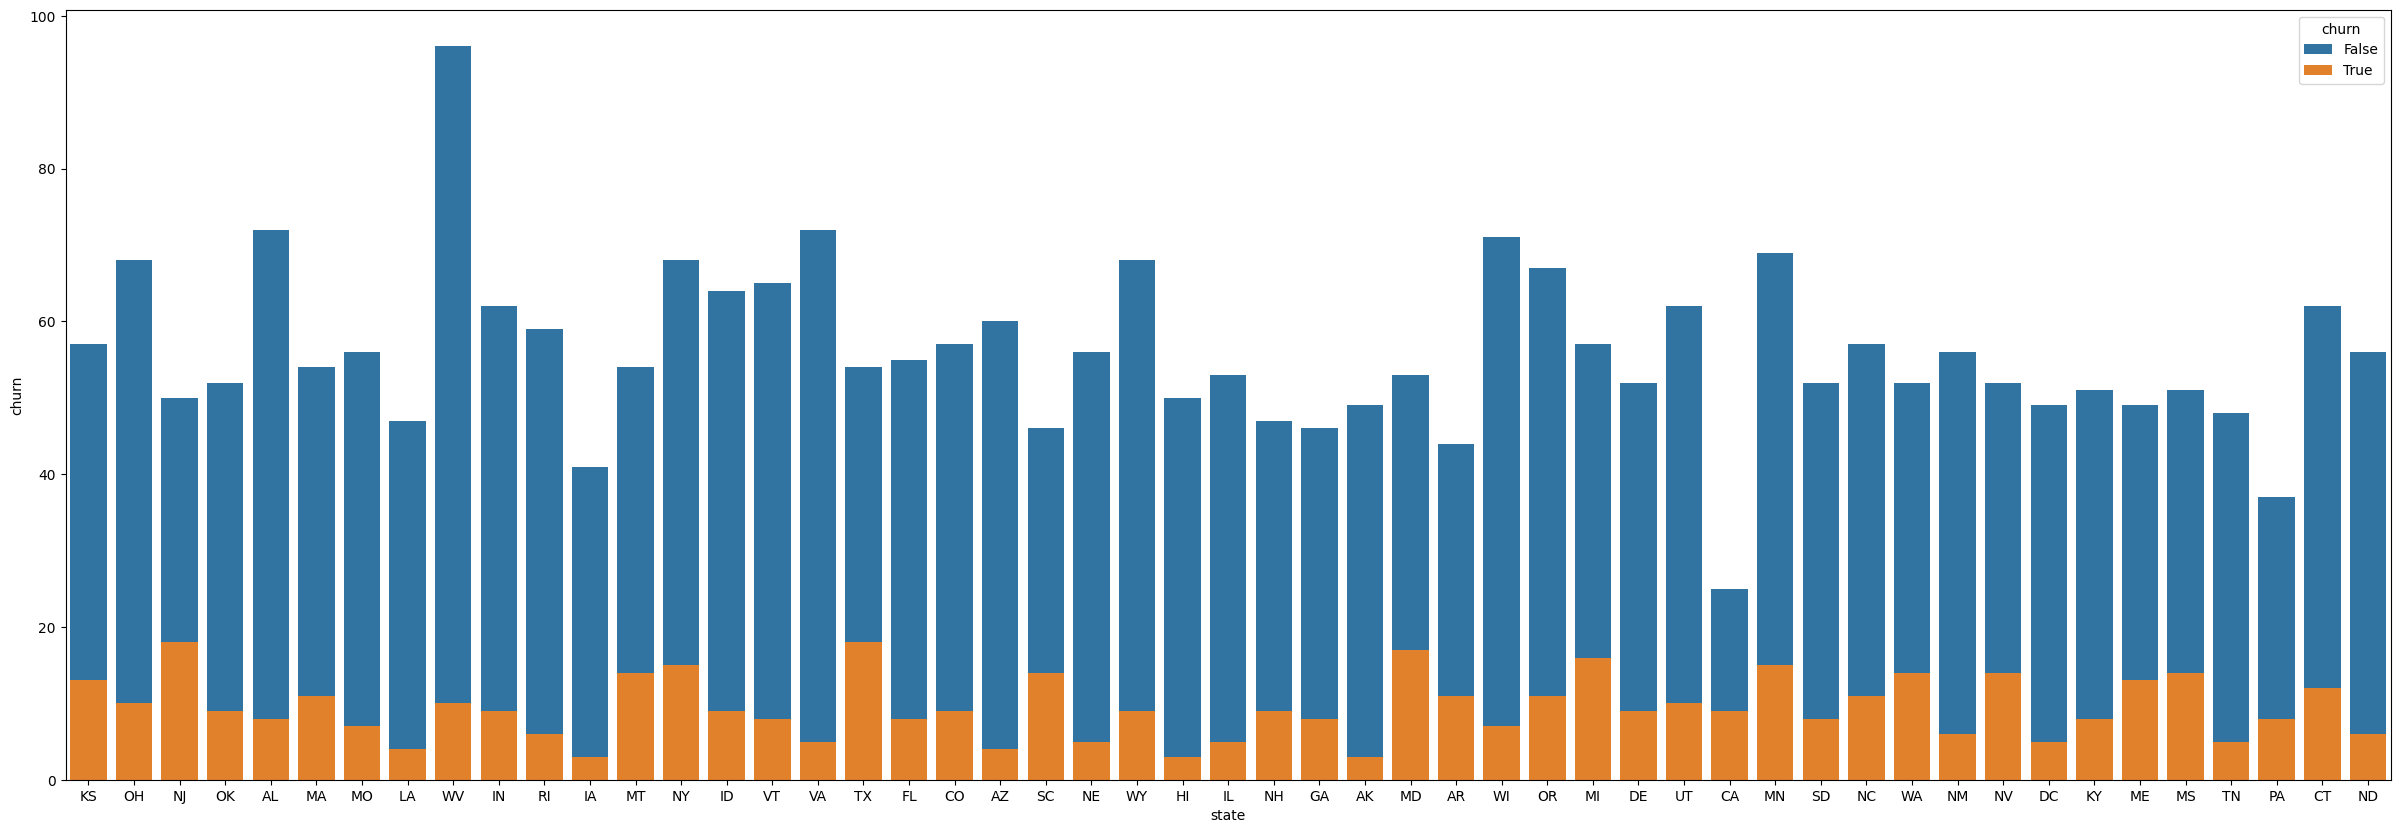

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(x='state', y='churn', data=df, hue='churn', estimator=len, dodge=False)
plt.tight_layout

Churn By Area Code

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

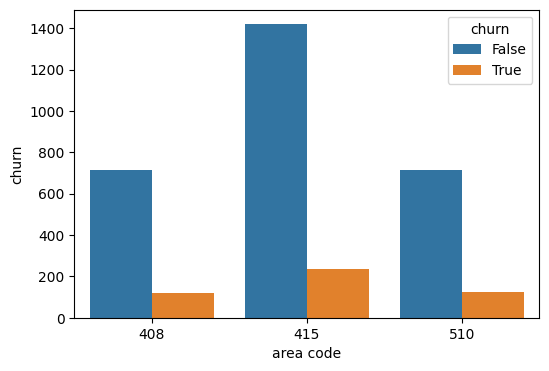

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='area code', y='churn', data=df, hue='churn', estimator=len)
plt.tight_layout

Churn By Customers with International plan

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

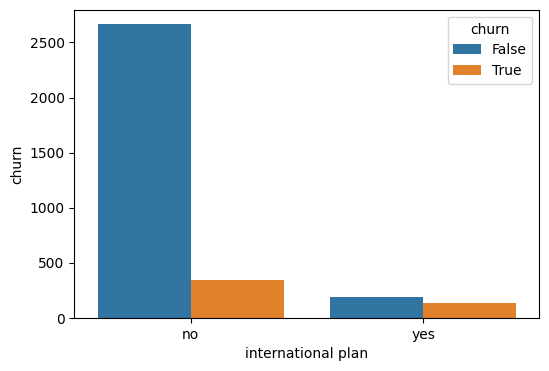

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x='international plan', y='churn', data=df, hue='churn', estimator=len, )
plt.tight_layout

Churn By Customers with Voice mail plan

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

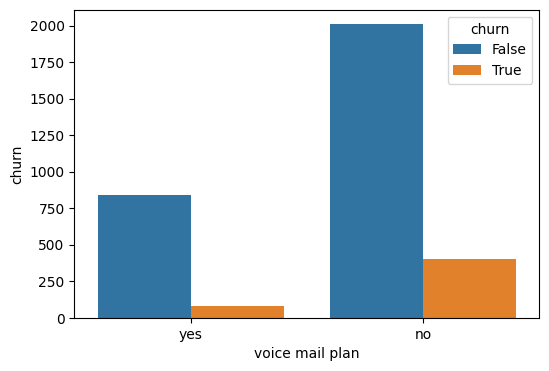

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x='voice mail plan', y='churn', data=df, hue='churn', estimator=len,)
plt.tight_layout

Assigning label encode to categorical values

In [16]:
label_encoder = preprocessing.LabelEncoder()

In [17]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [18]:
df.dtypes

state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [19]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
df.drop(["phone number"], axis = 1, inplace=True)

Building Feature Matrix :

In [21]:
X = df.drop(['churn'], axis=1)
print(X.shape)
print('\n')
X.head()

(3333, 19)




,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [22]:
y = df['churn']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

Standardize Feature Matrix values :

In [23]:
scaler = preprocessing.StandardScaler()
X =  scaler.fit_transform(X)

In [24]:
df_feat = pd.DataFrame(X, columns=df.columns[:-1])
df_feat.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,-0.678649,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.603170,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.333313,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,0.603170,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,0.670634,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


Using Stratified Cross Validation since data is not uniform

In [25]:
folds = StratifiedKFold(n_splits=10)

In [26]:
print('Logistic Regression:', round(cross_val_score(LogisticRegression(), X, y).mean(),3))
print('Gradient Boosting Classifier:', round(cross_val_score(GradientBoostingClassifier(), X, y).mean(),3))
print('Support vector machine(SVM):', round(cross_val_score(SVC(), X, y).mean(),3))
print('Random Forest Classifier:', round(cross_val_score(RandomForestClassifier(n_estimators=20), X, y).mean(),3))
print('K Nearest Neighbor Classifier:', round(cross_val_score(KNeighborsClassifier(), X, y).mean(),3))

Logistic Regression: 0.862


Gradient Boosting Classifier: 0.952
Support vector machine(SVM): 0.915
Random Forest Classifier: 0.946
K Nearest Neighbor Classifier: 0.886


Final Model Selection:  
Gradient Boosting seems to do comparatively for this case

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
GBC_model = GradientBoostingClassifier()
GBC_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [29]:
predictions = GBC_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       857
        True       0.95      0.68      0.79       143

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



<Axes: >

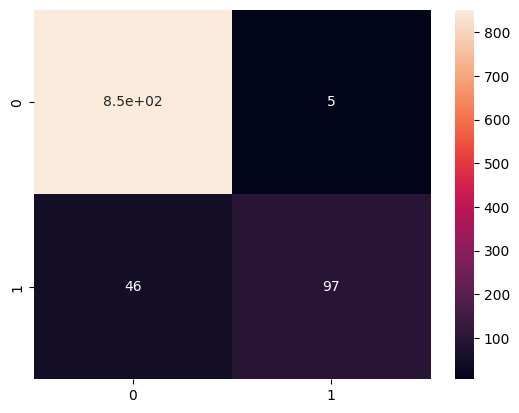

In [31]:
sns.heatmap(metrics.confusion_matrix(y_test, predictions), annot=True)

[0.0046008  0.00244694 0.         0.13446841 0.03063071 0.05515542
 0.14306733 0.00503683 0.13473109 0.07430254 0.00424493 0.0449869
 0.01884839 0.00409096 0.01364674 0.04219718 0.07516859 0.05231066
 0.1600656 ]


<Axes: >

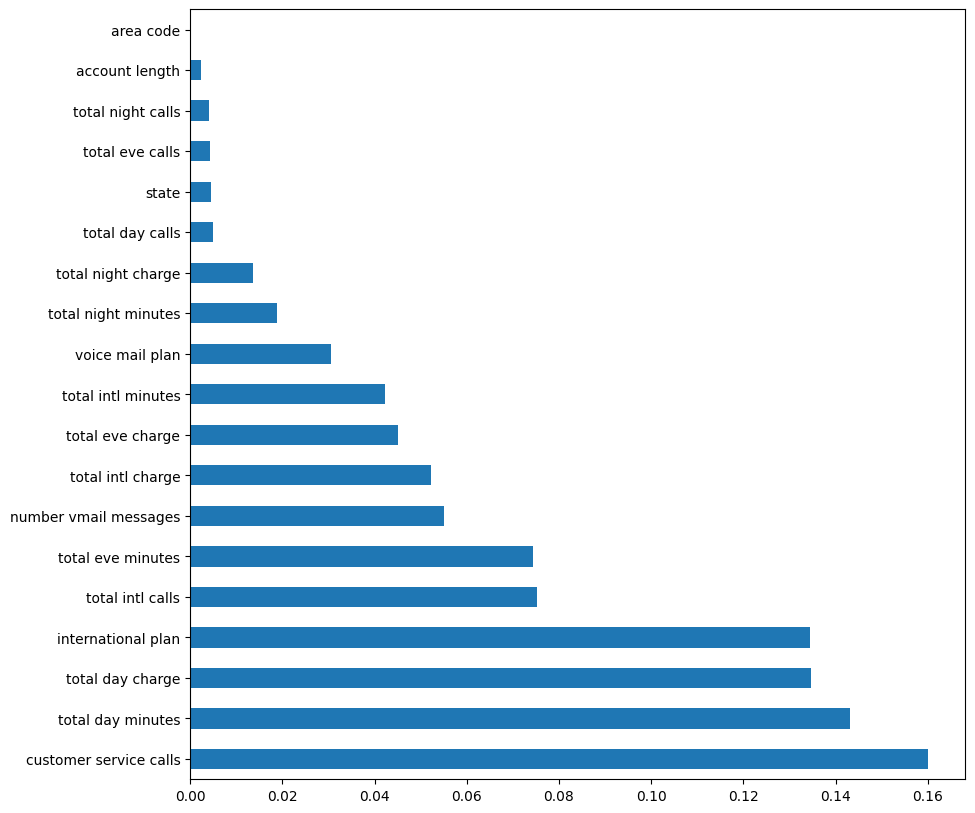

In [44]:
feature_importance = GBC_model.feature_importances_
print (GBC_model.feature_importances_)
feat_importances = pd.Series(GBC_model.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10,)) 

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')